<a href="https://colab.research.google.com/github/SamuelM-git/churn_telecom/blob/main/MS_Business_case_Churn_dans_les_t%C3%A9l%C3%A9coms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 - Téléchargement des librairies

In [ ]:
# Nos librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


#2 - Téléchargement des données

In [ ]:
# Chargeons les données
data = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Faisons une copie
data_churn = data.copy()


#3 - Exploration des données

In [ ]:
# Voyons les dimensions de notre dataset
print(f"Nous avons {data_churn.shape[0]} lignes et {data_churn.shape[1]} colonnes.")


Nous avons 7043 lignes et 21 colonnes.


In [ ]:
# Voyons le type de variables que nous avons
data_churn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Calculons le taux de churn
churn_rate = data_churn['Churn'].value_counts(normalize=True) * 100
print("\nTaux de churn :")
print(round(churn_rate, 2))



Taux de churn :
Churn
No     68.49
Yes    31.51
Name: proportion, dtype: float64


In [ ]:
# Vérifions les valeurs manquantes
print("\nValeurs manquantes :")
print(data_churn.isna().sum())



Valeurs manquantes :
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#4 - Visualisation des données

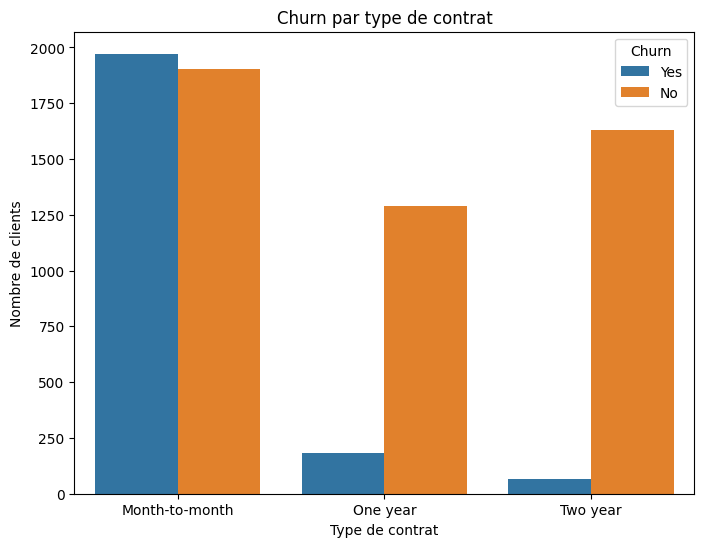

In [ ]:
# Visualisation 1 : Churn par type de contrat
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=data_churn)
plt.title("Churn par type de contrat")
plt.xlabel("Type de contrat")
plt.ylabel("Nombre de clients")
plt.show()


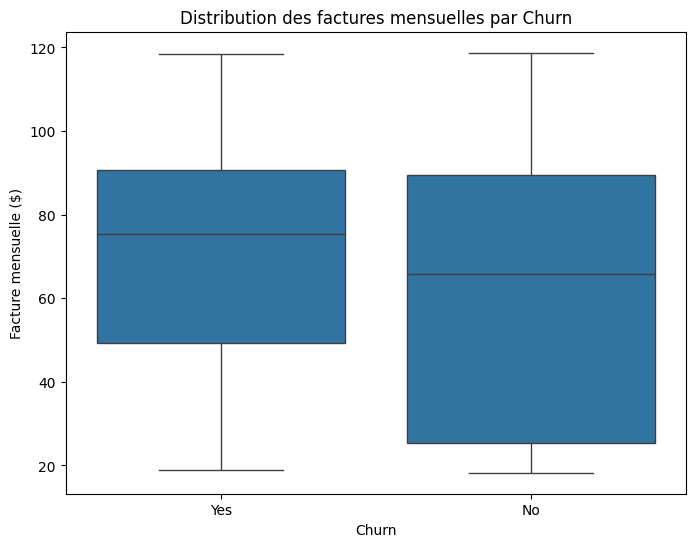

In [ ]:
# Visualisation 2 : Distribution des factures mensuelles par churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_churn)
plt.title("Distribution des factures mensuelles par Churn")
plt.xlabel("Churn")
plt.ylabel("Facture mensuelle ($)")
plt.show()


In [ ]:
# Affichons les fréquences des valeurs pour chaque colonne
for col in data_churn.columns:
    print(f"\n📊 Fréquences pour la colonne: {col}")
    print(data_churn[col].value_counts())



📊 Fréquences pour la colonne: customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64

📊 Fréquences pour la colonne: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

📊 Fréquences pour la colonne: SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

📊 Fréquences pour la colonne: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

📊 Fréquences pour la colonne: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

📊 Fréquences pour la colonne: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

📊 Fréquences pour la colonne: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

📊 Fréquences pour la col

#5 - Traitement

In [ ]:
# Suppression des doublons
data_clean = data_churn.drop_duplicates()


In [ ]:
# Supprimons la colonne des ID car pas d'intéret pour le ML
data_clean = data_clean.drop('customerID', axis=1)


In [ ]:
# Nous avons vu ci-dessus que nous avons 18 vairables ojets dont des variables catégorielles
# qui ont 2 ou plusieurs valeurs.
# Nous allons convertir ces variables catégorielles en numerique.

# Commencons par les variables catégorielles binaires :
# Le schéma de conversion
map_binaire = {
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0
}

# Colonnes binaires à encoder
colonnes_a_convertir = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Appliquer le mapping
for col in colonnes_a_convertir:
    data_clean[col] = data_clean[col].map(map_binaire)


In [ ]:
# On verifit
data_clean.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,Fiber optic,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,1
1,1,0,0,0,34,1,No,Fiber optic,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,Fiber optic,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,DSL,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
# Maintenant, nous allons convertir les variables avec plus de 2 catégories,
# nous allons faire de l'encodage one-hot

# Colonnes à encoder avec dummies
colonnes_a_convertir_2 = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod']

data_clean = pd.get_dummies(data_clean, columns=colonnes_a_convertir_2, drop_first=True)


In [ ]:
# On verifit
data_clean.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,1,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
# On regarde les types
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   object 
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [ ]:
# Ici, on va convertir la variable "TotalCharges" en numérique ainsi que
# les variables booléennes pour faciliter l'utilisation du ML


# Il se trouve que nous avons des cellules vides dans la colonne "TotalCharges",
# d'où pour convertir proprement la variable, nous faisons :
data_clean['TotalCharges'] = pd.to_numeric(data_clean['TotalCharges'], errors='coerce')

# Nous remplacons les NaN (ici les chaînes vides) par la médiane de la colonne
data_clean['TotalCharges'] = data_clean['TotalCharges'].fillna(data_clean['TotalCharges'].median())


In [ ]:
# Miantenant, nous traitons les booléens
data_clean = data_clean.astype({col: 'int' for col in data_clean.select_dtypes(include='bool').columns})


In [ ]:
# On regarde les types
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [ ]:
# Calculons la matrice de corrélation
correlation_matrix = data_clean.corr(numeric_only=True)

# Affichons la matrice
display(correlation_matrix)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,-0.000002,-0.004313,...,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,0.001215,0.000752,0.013744
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102652,0.123719,...,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,-0.024135,0.171718,-0.153477
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318364,-0.197469,...,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,0.082029,-0.083852,-0.095125
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.063593,-0.171337,...,0.063268,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,0.060267,-0.150642,0.059071
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.825464,-0.463944,...,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.233006,-0.208363,-0.233852
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113013,0.007105,...,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,-0.007721,0.003062,-0.003319
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158055,0.143589,...,0.037880,-0.321013,0.223841,-0.321013,0.211716,-0.051391,-0.147889,-0.013589,0.208865,-0.205398
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650864,0.111523,...,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.030550,0.271625,-0.377437
TotalCharges,-0.000002,0.102652,0.318364,0.063593,0.825464,0.113013,0.158055,0.650864,1.000000,-0.289231,...,0.432329,-0.374706,0.515279,-0.374706,0.519884,0.170649,0.356226,0.182745,-0.059971,-0.294814
Churn,-0.004313,0.123719,-0.197469,-0.171337,-0.463944,0.007105,0.143589,0.111523,-0.289231,1.000000,...,-0.193943,-0.169739,0.004474,-0.169739,-0.000475,-0.211999,-0.335351,-0.154855,0.279502,-0.013739


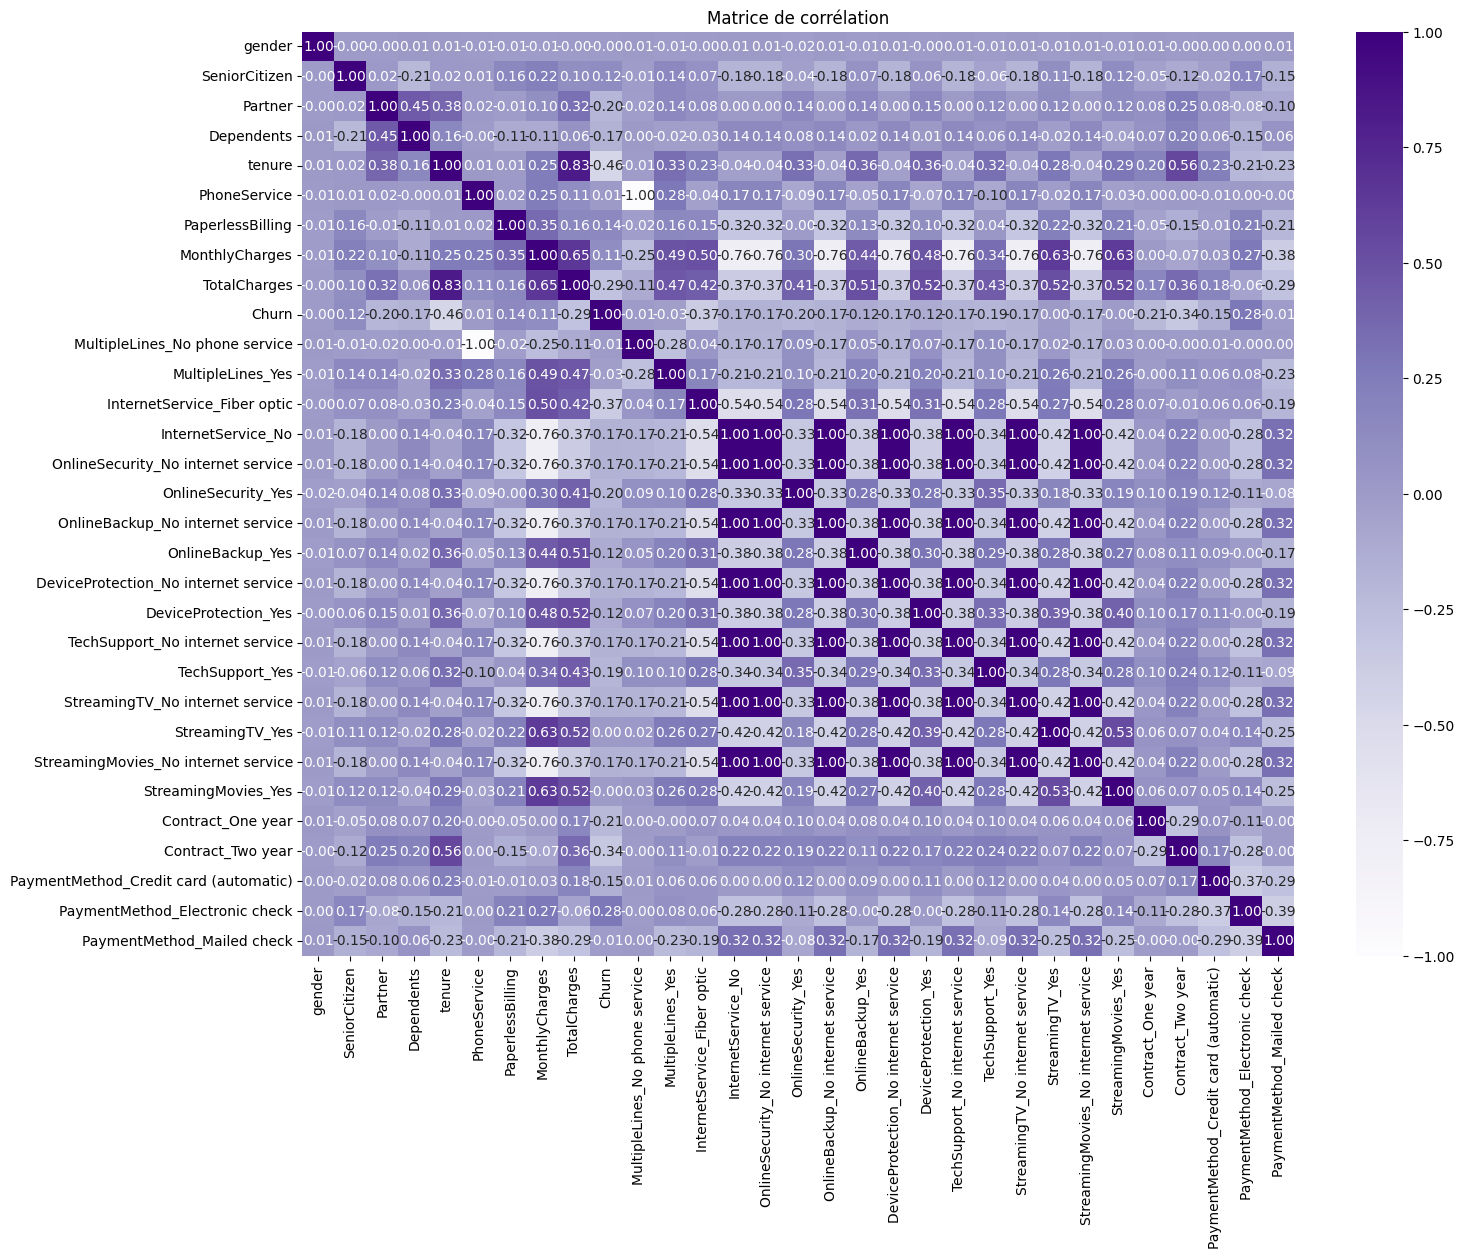

In [ ]:
# Affichage (dans Jupyter ou Colab)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples')
plt.title('Matrice de corrélation')
plt.show()


Les clients à risque à appeler en priorité sont ceux qui :    
- (corrélation positive) ont un "PaymentMethod_Electronic check" qui augment;
- (corrélation négative) et les variables suivantes qui baissent : "tenure", "TotalCharges", "InternetService_Fiber optic", "Contract_Two year".

#6 - Machine Learning

#6 - 1 - Préparation des données

In [ ]:
# Nous définissons nos variables explicatives X et notre cible y
X = data_clean.drop('Churn', axis=1)
y = data_clean['Churn']


#6 - 2 - Séparation en train / test

In [ ]:
# Nous séparons notre jeux de données en 2 parties : entrainement et test
# 80% pour entraînement, 20% pour test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


#6 - 3 - Entrainement du modele

In [ ]:
# Ici, nous allons choisir le Régression Logistique (LogisticRegression)
# Création du modèle
model = LogisticRegression(max_iter=1000)

# Entraînement du modèle
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Ici, le message ConvergenceWarning nous dit que notre modèle de régression logistique n'a pas résussi à converger complétement après les 1000 itérations fixées.

La régression logistique essaye de trouver les bons coefficients pour prédire le churn.
Mais comme les données ne sont pas standardisées/scalées, ou trop complexes, elle n’arrive pas à stabiliser l’optimisation avant d’atteindre la limite d’itérations.

Nous allons donc standardiser.

In [ ]:
# Nous allons standardiser les données
scaler = StandardScaler()

# Appliquons uniquement sur les X (pas y)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Réentraînons avec données scalées
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

#6 - 4 - Evaluons le modèle

In [ ]:
# Prédictions
y_pred = model.predict(X_test_scaled)


In [ ]:
# Affichons les scores
print("L'accuracy est de :", accuracy_score(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))


L'accuracy est de : 0.8750887154009936

Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       959
           1       0.82      0.78      0.80       450

    accuracy                           0.88      1409
   macro avg       0.86      0.85      0.85      1409
weighted avg       0.87      0.88      0.87      1409



Interprétation :

- Classe 0 (non-churn) : très bien captée par le modèle.

- Classe 1 (churn) : plus difficile à détecter. Le rappel est un peu faible (0.78), cela veut dire que 22 % des vrais churn ne sont pas détectés.

- L'accuracy est élevée (87.5%), mais attention : elle peut être trompeuse s'il y a un déséquilibre entre churn et non-churn.


In [ ]:
# Vérifions le déséquilibre entre les classes
y.value_counts(normalize=True)

,proportion
Churn,
0,0.684935
1,0.315065


C’est un déséquilibre modéré (mais non négligeable).
Cela peut fausser le modèle, car il peut être tenté de prédire surtout des 0 (non-churn), ce qui lui donne une "bonne" accuracy... même s’il rate des cas importants (les churns réels).

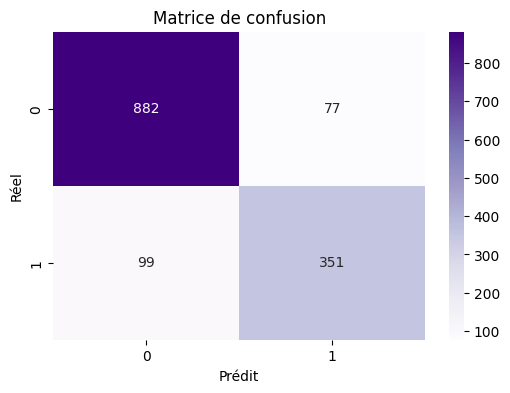

In [ ]:
# Matrice de confusion
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()
